In [1]:
import cv2
import matplotlib.pyplot as plt
import os

## train.json

In [2]:
import json

with open("datasets/train.json", "r") as st_json:
    data = json.load(st_json)

train/60.png
W = 640, H = 345


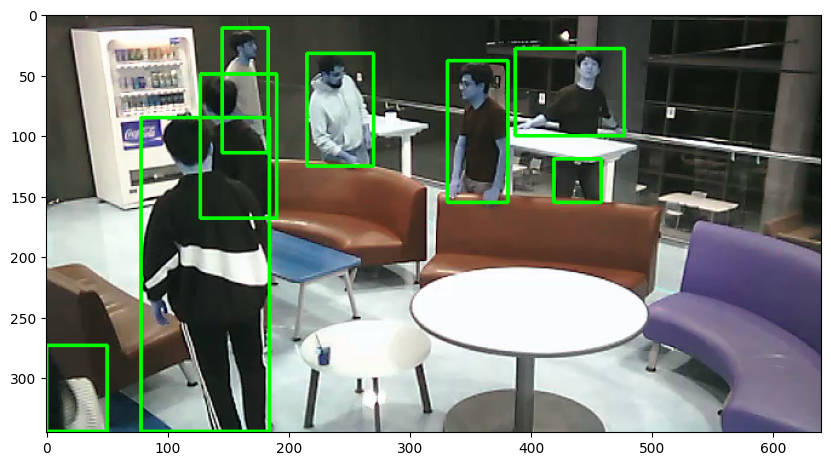

In [3]:
imgs = data['images']
number = 60
file_name = imgs[number]['file_name']
print(file_name)
file_name = f'./datasets/{file_name}'

image = cv2.imread(file_name)
H, W , _ = image.shape
print(f"W = {W}, H = {H}")

anno = data['annotations']
anno_0 = []
for a in anno:
    if a['image_id']==number:
        anno_0.append(a)


for a in anno_0:
    bbox = a['bbox']
    x, y, w, h = bbox
    
    x_end = x+w
    y_end = y+h
    
    # bounding box 그리기
    cv2.rectangle(image, (x, y), (x_end, y_end), (0, 255, 0), 2)  # (0, 255, 0)은 색상, 2는 선의 두께

# 이미지 보여주기
plt.figure(figsize=(10,10))
plt.imshow(image)
    

## For yolo format

In [4]:
img_path = 'datasets/yolo_dataset/images/train/60.png'
label_path = img_path.replace('images','labels').replace('png', 'txt')

image shape: (345, 640, 3)
['9 0.204687 0.621739 0.165625 0.750725\n', '13 0.378906 0.227536 0.085938 0.269565\n', '5 0.556250 0.279710 0.078125 0.339130\n', '4 0.256250 0.181159 0.059375 0.298551\n', '14 0.247656 0.314493 0.098437 0.344928\n', '11 0.675000 0.185507 0.140625 0.208696\n', '11 0.685156 0.397101 0.060937 0.104348\n', '6 0.039062 0.894203 0.078125 0.205797\n']
9 0.204687 0.621739 0.165625 0.750725
77 84 183 344
13 0.378906 0.227536 0.085938 0.269565
214 31 270 124
5 0.556250 0.279710 0.078125 0.339130
331 38 381 154
4 0.256250 0.181159 0.059375 0.298551
144 10 182 113
14 0.247656 0.314493 0.098437 0.344928
127 49 189 168
11 0.675000 0.185507 0.140625 0.208696
387 27 477 99
11 0.685156 0.397101 0.060937 0.104348
419 118 457 154
6 0.039062 0.894203 0.078125 0.205797
0 273 49 344


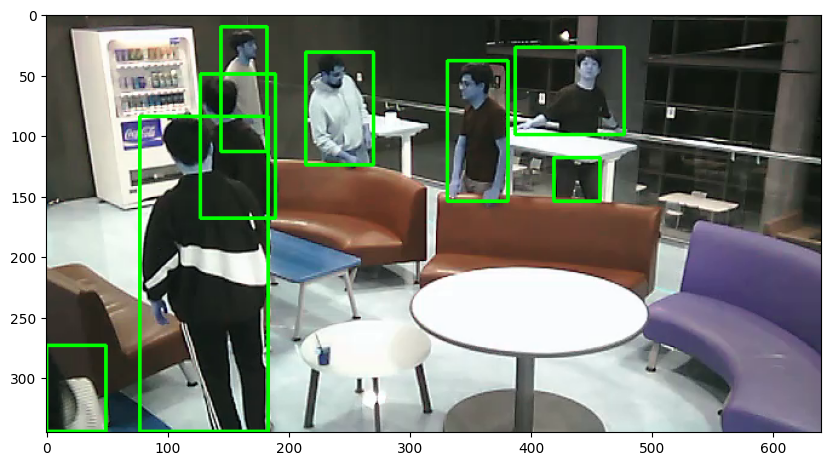

In [5]:

# 이미지 로드
image = cv2.imread(img_path)
H, W, _ = image.shape
print(f"image shape: {image.shape}")

# bounding box 좌표
f = open(label_path, 'r')     # mode = 부분은 생략해도 됨
lines = f.readlines()
print(lines)

for line in lines:
    line = line.strip()
    c, x_c, y_c, w, h = line.split(" ")
    print(c,x_c,y_c,w,h)
    
    x_c = float(x_c)
    y_c = float(y_c)
    w = float(w)
    h = float(h)
    
    x = int(W* (x_c - w/2) )
    y = int(H* (y_c - h/2))
    x_end = int(W*(x_c + w/2))
    y_end = int(H*(y_c + h/2))

    print(x,y, x_end, y_end)
    # bounding box 그리기
    cv2.rectangle(image, (x, y), (x_end, y_end), (0, 255, 0), 2)  # (0, 255, 0)은 색상, 2는 선의 두께

# 이미지 보여주기
plt.figure(figsize=(10,10))
plt.imshow(image)